In [1]:
import pandas as pd


In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Dataset Overview:")
print(customers.info())
print(customers.head())

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("\nProducts Dataset Overview:")
print(products.info())
print(products.head())


Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("\nTransactions Dataset Overview:")
print(transactions.info())
print(transactions.head())


Transactions Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070

In [6]:
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
#shows no missing values in all dataset

In [8]:
print("\nDuplicate Records:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Records:
Customers: 0
Products: 0
Transactions: 0


In [9]:
#shows no duplicate records in all dataset

In [10]:
print("\nBasic Statistics (Transactions):")
print(transactions.describe())



Basic Statistics (Transactions):
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [11]:
print("\nBasic Statistics (Products):")
print(products.describe())



Basic Statistics (Products):
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [12]:
print("\nBasic Statistics (Customer):")
print(customers.describe())



Basic Statistics (Customer):
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [13]:
# Customer analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
region_count = customers['Region'].value_counts()
print("Customers by Region:\n", region_count)

Customers by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [16]:
# in South america we have more customers compared to asia

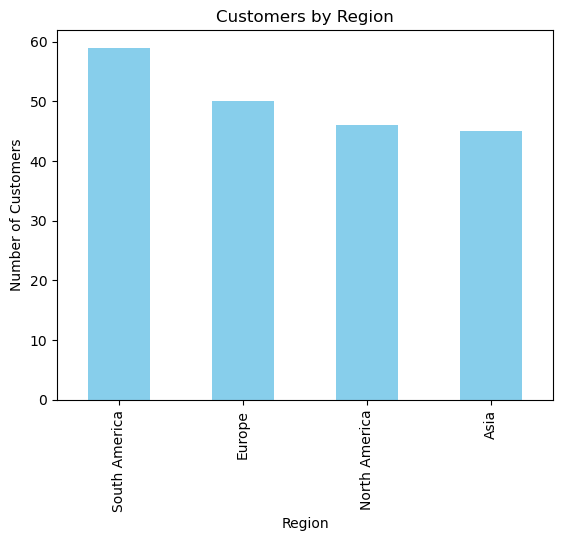

In [17]:
region_count.plot(kind='bar', title='Customers by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [18]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
print("Signup Trends:\n", signup_trends)

Signup Trends:
 SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [19]:
# compared to past year '2023', this year '2024' more customers signup in our webstie

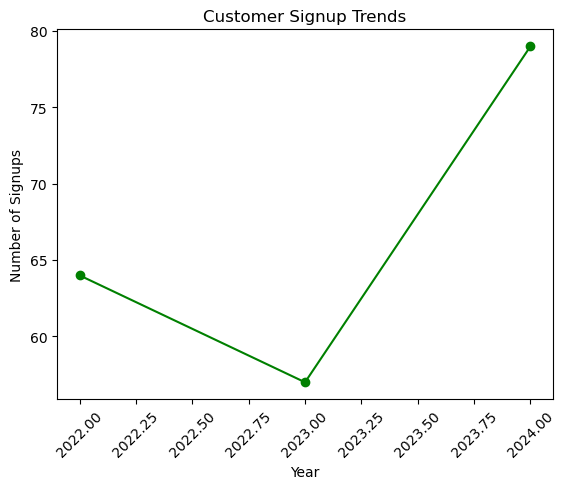

In [20]:
signup_trends.plot(kind='line', marker='o', title='Customer Signup Trends', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Product analysis

In [22]:
popular_products = transactions['ProductID'].value_counts()
print("Most Popular Products:\n", popular_products.head())
print("Least Popular Products:\n", popular_products.tail())

Most Popular Products:
 ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
Name: count, dtype: int64
Least Popular Products:
 ProductID
P024    5
P014    4
P031    4
P044    4
P099    4
Name: count, dtype: int64


In [23]:
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 Product Sales:\n", product_sales.head())

Top 5 Product Sales:
 ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


In [24]:
# top 5 products are P029,P079,P048, P020, P062

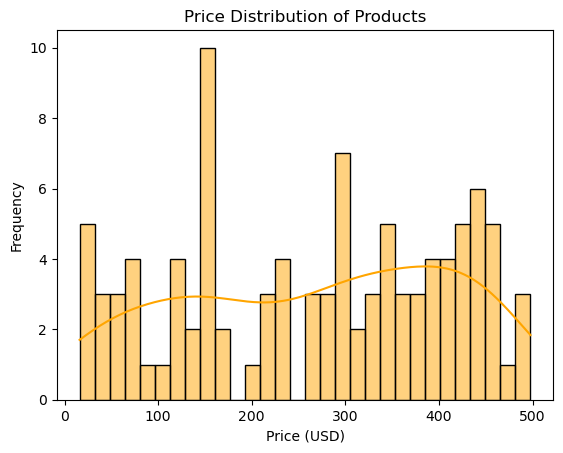

In [25]:
# Distribution of price
sns.histplot(products['Price'], bins=30, kde=True, color='orange')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [26]:
# there are totally 10 products available in the price range of Rs.140 - Rs.160
# around 3 to 4 products only in maximum price range

In [27]:
# Transaction analysis

In [28]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
revenue_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
revenue_trends

YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

In [29]:
# Max revenue generated on july and september of 2024

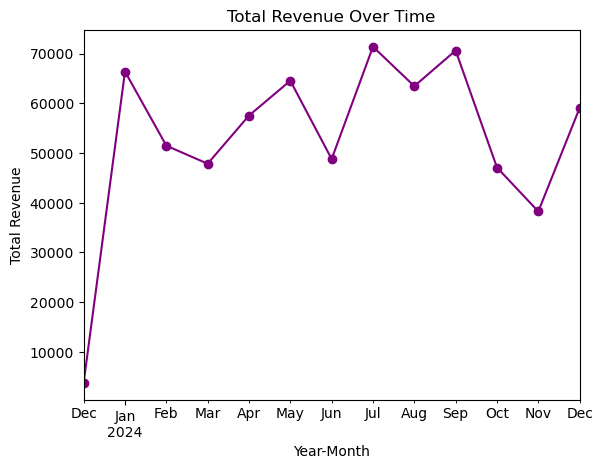

In [30]:
revenue_trends.plot(kind='line', marker='o', title='Total Revenue Over Time', color='purple')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()


In [31]:
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
monthly_revenue

Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64

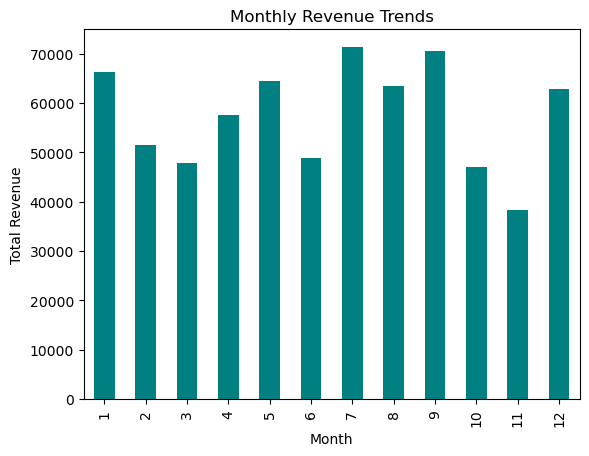

In [32]:
monthly_revenue.plot(kind='bar', title='Monthly Revenue Trends', color='teal')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [33]:
region_revenue = transactions.merge(customers, on='CustomerID')
region_revenue = region_revenue.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:\n", region_revenue)

Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [34]:
# south america is contributing highest revenue because we are having more user in South america compared to Asia

In [35]:
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("Top 5 High-Value Customers:\n", customer_revenue.head())

Top 5 High-Value Customers:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [36]:
print("Most Purchased Products:\n", transactions['ProductID'].value_counts().head())

Most Purchased Products:
 ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
Name: count, dtype: int64


In [37]:
# Save EDA results to a file
eda_summary = {
    "Customers by Region": region_count,
    "Signup Trends": signup_trends,
    "Revenue by Region": region_revenue,
    "Top Products by Revenue": product_sales.head()
}

# Save EDA summary to a CSV
summary_df = pd.DataFrame.from_dict(eda_summary, orient='index').transpose()
summary_df.to_csv('EDA_Summary.csv', index=False)
